# Project : Zomato API - II Question 3rd (Visualization)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator
df = pd.read_csv('/Users/atharvjairath/Downloads/zomato.csv',encoding='latin-1')


In [2]:
df=df[df["Country Code"]==1]
df #Data with Indian Restaurants

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,"North Indian, European",...,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,45
630,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,4,4.3,Green,Very Good,133
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,...,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,41
632,3400348,G Thal,1,Agra,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",0.000000,0.000000,"Rajasthani, Gujarati, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,59
633,3400072,Dawat-e-Nawab - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,46


Plot the bar graph top 15 restaurants have a maximum number of outlets.

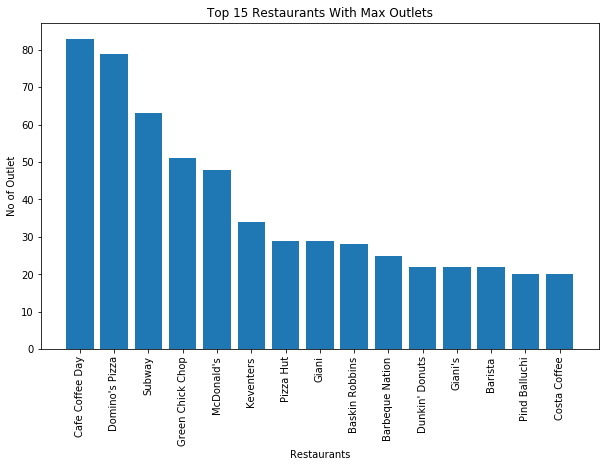

In [31]:
outlets={}
for _,row in df.iterrows():  # itterating in rows of data frame 'df'
    x= row["Restaurant Name"].strip()
    outlets[x] = outlets.get(x,0) + 1
sorted_d = dict( sorted(outlets.items(), key=operator.itemgetter(1),reverse=True))  #sorting dict 
Restaurant_name= [ k for k in sorted_d ][0:15]  # converting to list
Outlet= [ v for v in sorted_d.values() ][0:15]
plt.subplots(figsize=(10,6))
plt.bar(Restaurant_name, Outlet)
plt.xlabel('Restaurants', fontsize=10)
plt.ylabel('No of Outlet', fontsize=10)
plt.title('Top 15 Restaurants With Max Outlets')
plt.xticks(rotation=90)
plt.show()
    

Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

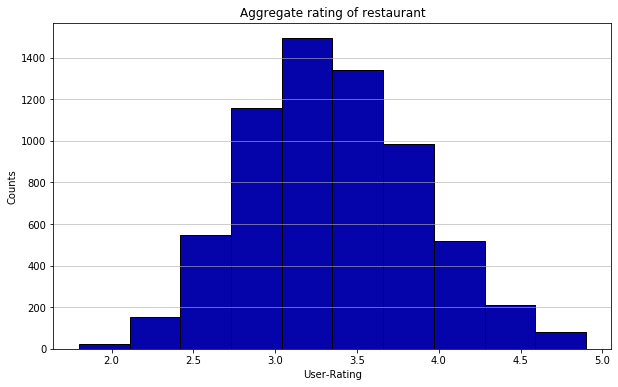

In [48]:
rating=[]
for _,row in df.iterrows(): # itterating in data as rows
    x= row["Aggregate rating"]
    if x:
        rating.append(x)
        
plt.subplots(figsize=(10,6))    
plt.hist(rating, color='#0504aa',alpha=1,edgecolor="black")
plt.xlabel('User-Rating')
plt.ylabel('Counts')
plt.title("Aggregate rating of restaurant")
plt.grid(axis='y', alpha=0.75)
plt.show()

## Plot the bar graph top 10 restaurants in the data with the highest number of votes.

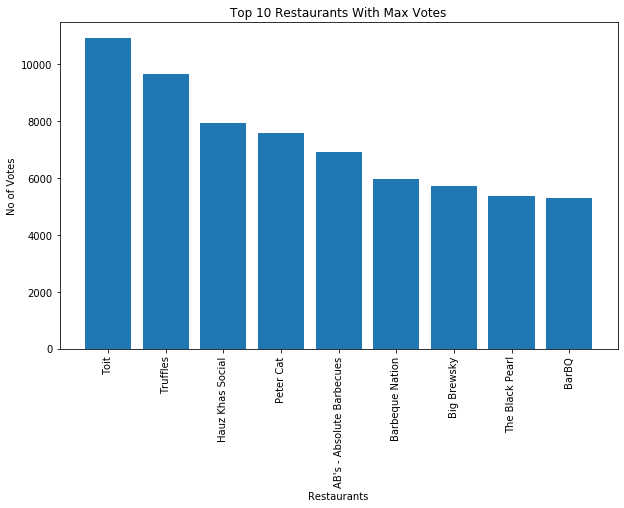

In [58]:
df_top=df.copy()
df_top.sort_values("Votes",inplace=True,ascending=False)
rest_name=[]
votes=[]
for _,row in df_top[0:10].iterrows():
    x= row["Restaurant Name"].strip()
    y=row["Votes"]
    rest_name.append(x)
    votes.append(y)
plt.subplots(figsize=(10,6))
plt.bar(rest_name, votes)
plt.xlabel('Restaurants', fontsize=10)
plt.ylabel('No of Votes', fontsize=10)
plt.title('Top 10 Restaurants With Max Votes')
plt.xticks(rotation=90)
plt.show()

# Plot the pie graph of top 10 cuisines present in restaurants in the USA.

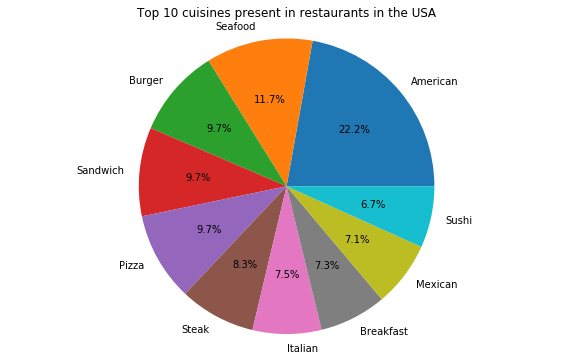

In [102]:
df2 = pd.read_csv('/Users/atharvjairath/Downloads/zomato.csv',encoding='latin-1')
df2=df2[df2["Country Code"]==216]

cuisines={}
for _,row in df2.iterrows():
    if str(row["Cuisines"]):
        x=str(row["Cuisines"])
        x=x.strip().split(',')
    for ele in x:
        cuisines[ele.strip()] = cuisines.get(ele.strip(),0) + 1

sorted_d = dict( sorted(cuisines.items(), key=operator.itemgetter(1),reverse=True))          
Cuisine_name= [ k for k in sorted_d ][0:10]
Counts= [ v for v in sorted_d.values() ][0:10]
plt.subplots(figsize=(10,6))
plt.pie(Counts,labels=Cuisine_name,autopct='%1.1f%%')
plt.title("Top 10 cuisines present in restaurants in the USA")
plt.axis("equal")
plt.show()
                                      
        
        

# Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

In [18]:
df['Aggregate_rating_Votes']=df['Aggregate rating']*df['Votes'] #making another column Aggregate_rating_Votes.
data=df.copy() 
city=[]
city_rest={}
Weighted_Restaurant_Rating=[]
top_10_city=[]
top_10_weighted=[]
p=data.City.value_counts() 
num_rest=p.values
new_index = p.index #making new index of p values.
for ele in new_index:
    
    d=data[data['City']==ele]
    total_result = d['Aggregate_rating_Votes'].sum()
    count= d['Votes'].sum()
    if count == 0: #if count zero then continue other wise total_result/count give error.
        continue
    weighted=total_result/count
    city.append(ele)
    Weighted_Restaurant_Rating.append(weighted)
print(city)
print("----------------------------------------------------")
print(Weighted_Restaurant_Rating)
print("----------------------------------------------------")
print(num_rest)

    

['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad', 'Bhubaneshwar', 'Amritsar', 'Guwahati', 'Ahmedabad', 'Lucknow', 'Vizag', 'Puducherry', 'Goa', 'Nashik', 'Indore', 'Aurangabad', 'Allahabad', 'Kolkata', 'Bhopal', 'Jaipur', 'Ranchi', 'Bangalore', 'Dehradun', 'Mysore', 'Chennai', 'Kanpur', 'Mumbai', 'Surat', 'Coimbatore', 'Nagpur', 'Kochi', 'Agra', 'Mangalore', 'Varanasi', 'Vadodara', 'Ludhiana', 'Pune', 'Patna', 'Hyderabad', 'Chandigarh', 'Secunderabad', 'Panchkula', 'Mohali']
----------------------------------------------------
[3.765871502689627, 3.7439580811138016, 3.472630905726105, 3.4829787234042553, 3.037869822485207, 3.9677586613245337, 3.7645839017735336, 4.265733279613215, 4.163215392140877, 4.3235268346111715, 4.131187061336589, 3.73706191588785, 4.158438203735594, 3.5872553699284, 3.998346242411555, 3.427314814814815, 3.4096264367816085, 4.295151705424619, 4.125929787973584, 4.281507965242579, 3.57360265633647, 4.497423148890671, 4.016172839506172, 3.76120244246125,

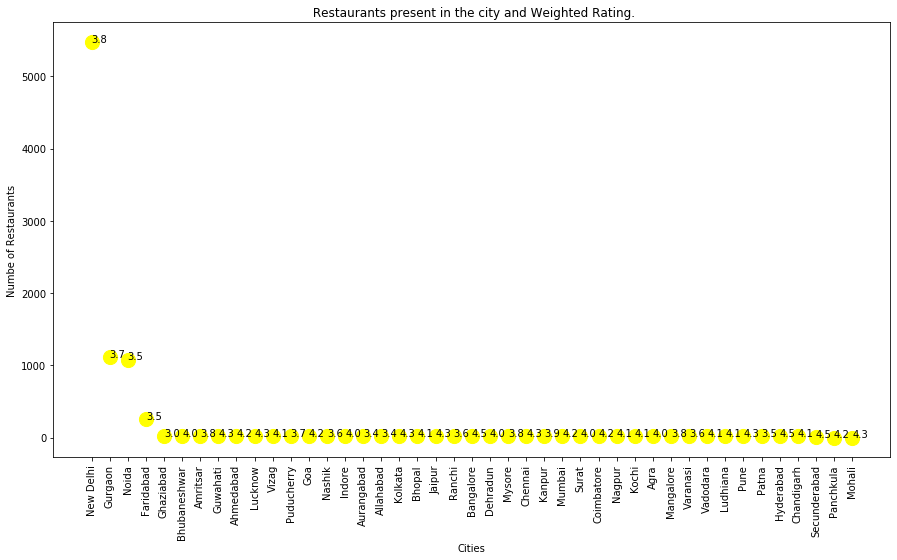

In [49]:
## Graph
plt.subplots(figsize=(15,8))  
plt.scatter(city,num_rest,s=200,color="yellow")
plt.xlabel('Cities')
plt.ylabel('Numbe of Restaurants')
plt.xticks(rotation=90)
plt.title(' Restaurants present in the city and Weighted Rating.')
for i in range(len(Weighted_Restaurant_Rating)):
    plt.text(new_index[i],num_rest[i],Weighted_Restaurant_Rating[i]) #text value in graph.
plt.show()
